In [22]:
include("../src/models.jl")
include("../src/special.jl")

using Plots
using ProgressBars
using LinearAlgebra

In [63]:
p = 1000
N = 120
ω = 1.0
ρ = 0.05
τ = 0.5
β = 0.27
T = 10
σ = 0.0
ts = Array{Float64}(0:T*p) / p

ξ, spiked = spikedmodel(ρ, p, ω, σ);

In [70]:
x = randn((1, p)) .* (1/2) .+ 1/sqrt(2)
η(x, ϕ) = x - ϕ(x)/size(x,2)
Q = zeros(T*p+1)
Q[1] = dot(x, ξ) / (norm(x) * norm(ξ))

for t ∈ 1:T*p
    y_k = spiked(1)
    x_g = x + (τ/p) .* x * y_k' * y_k
    prox_x = η(x_g, x -> β*sgn(x))
    x = sqrt(p) * prox_x / norm(prox_x)
    Q[t+1] = dot(x, ξ) / (norm(x) * norm(ξ))
end

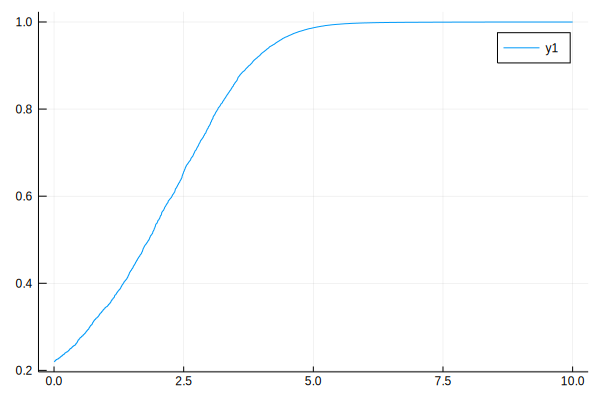

In [71]:
plot(ts, Q)